In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/kidneyData.csv
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (3178).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (3561).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (900).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1148).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (268).jpg
/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-S

In [1]:
import os
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random
import os
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data/kidneyData.csv')
df

,Unnamed: 0,image_id,path,diag,target,Class
0,0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
...,...,...,...,...,...,...
12441,12441,Cyst- (2522),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12442,12442,Cyst- (2627),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12443,12443,Cyst- (972),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12444,12444,Cyst- (2323),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst


In [3]:
image_size = (125, 125)
tumor_path = 'C:/Users/grfor/Desktop/Masters/BT5153 - Applied Machine Learning/Grp Proj/data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor-'
cyst_path = 'C:/Users/grfor/Desktop/Masters/BT5153 - Applied Machine Learning/Grp Proj/data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst-'
stone_path = 'C:/Users/grfor/Desktop/Masters/BT5153 - Applied Machine Learning/Grp Proj/data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/Stone-'
normal_path = 'C:/Users/grfor/Desktop/Masters/BT5153 - Applied Machine Learning/Grp Proj/data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal-'

In [4]:
def load_images_labels(image_size):
    images, labels = [], []
    for i in range(len(df)):
        if df['path'].iloc[i].split('/')[-2] == 'TUMOR':
            #tumour
            full_path = tumor_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size)
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
        elif df['path'].iloc[i].split('/')[-2] == 'CYST':
            #tumour
            full_path = cyst_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size)
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
        elif df['path'].iloc[i].split('/')[-2] == 'STONE':
            #tumour
            full_path = stone_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size)
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
        elif df['path'].iloc[i].split('/')[-2] == 'NORMAL':
            #tumour
            full_path = normal_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size)
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
    return np.array(images), np.array(labels)

In [5]:
images, labels = load_images_labels(image_size)

In [6]:
print(images.shape, labels.shape)

(12446, 125, 125, 3) (12446,)


In [7]:
# Prepare the data for clustering and logistic regression
X = images.reshape(len(images), -1)
y = labels

# Cluster the data into 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
labels_pred = kmeans.fit_predict(X)

# Print the number of images in each cluster
unique_labels, counts = np.unique(labels_pred, return_counts=True)
for i in range(len(unique_labels)):
    print(f"Cluster {unique_labels[i]}: {counts[i]} images")

C:\Users\grfor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: 4237 images
Cluster 1: 8209 images


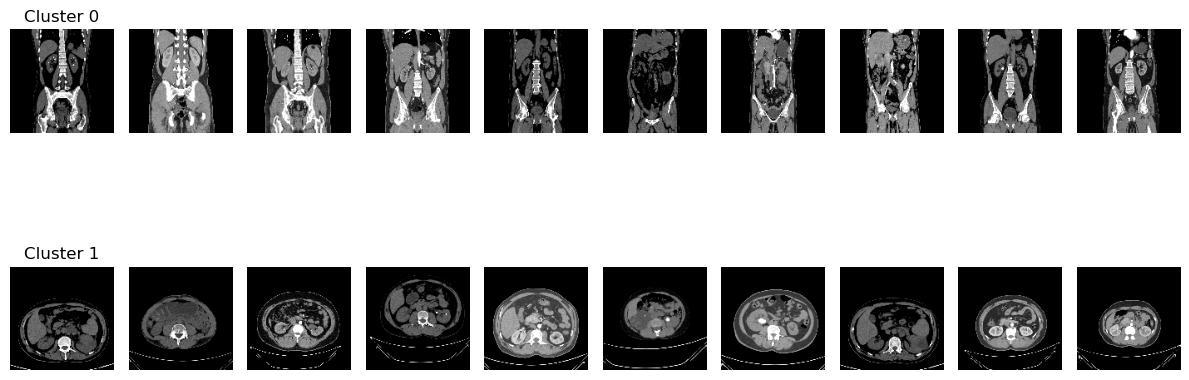

In [21]:
# Print 10 image samples for each cluster
num_samples = 10
fig, axs = plt.subplots(2, num_samples, figsize=(12, 6))
for i in range(2):
    cluster_indices = np.where(labels_pred == i)[0]
    sample_indices = np.random.choice(cluster_indices, num_samples, replace=False)
    for j, idx in enumerate(sample_indices):
        axs[i, j].imshow(images[idx])
        axs[i, j].axis("off")
        if j == 0:
            axs[i, j].set_title(f"Cluster {i}")
plt.tight_layout()
plt.show()

## Random Forest

In [115]:
def load_images_labels(image_size):
    images, labels = [], []
    for i in range(len(df)):
        if df['path'].iloc[i].split('/')[-2] == 'TUMOR':
            #tumour
            full_path = tumor_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size)
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
        elif df['path'].iloc[i].split('/')[-2] == 'CYST':
            #tumour
            full_path = cyst_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size)
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
        elif df['path'].iloc[i].split('/')[-2] == 'STONE':
            #tumour
            full_path = stone_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size)
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
        elif df['path'].iloc[i].split('/')[-2] == 'NORMAL':
            #tumour
            full_path = normal_path + df['path'].iloc[i].split('-')[-1]
            #append rest
            label = df['target'].iloc[i]
            image = load_img(full_path, target_size=image_size)
            image_array = img_to_array(image) / 255.0
            images.append(image_array)
            labels.append(label)
    return np.array(images), np.array(labels)

In [116]:
image_size = (200,200)
images, labels = load_images_labels(image_size)

In [8]:
X = np.reshape(images, (len(images), -1))
y = labels

print(X.shape, y.shape)

# Prepare the data for cluster 0
X_cluster0 = X[labels_pred == 0]
y_cluster0 = y[labels_pred == 0]

# Split the data into training and validation sets for cluster 0
X_val_cluster0, X_test_cluster0, y_val_cluster0, y_test_cluster0 = train_test_split(X_cluster0, y_cluster0, test_size=0.1, random_state=42)
X_train_cluster0, X_val_cluster0, y_train_cluster0, y_val_cluster0 = train_test_split(X_val_cluster0, y_val_cluster0, test_size=0.1, random_state=42)

# Prepare the data for cluster 1
X_cluster1 = X[labels_pred == 1]
y_cluster1 = y[labels_pred == 1]

# Split the data into training and validation sets for cluster 1
X_val_cluster1, X_test_cluster1, y_val_cluster1, y_test_cluster1 = train_test_split(X_cluster1, y_cluster1, test_size=0.1, random_state=42)
X_train_cluster1, X_val_cluster1, y_train_cluster1, y_val_cluster1 = train_test_split(X_val_cluster1, y_val_cluster1, test_size=0.1, random_state=42)


(12446, 46875) (12446,)


In [120]:
# Train the Random Forest classifier
rf_cluster0 = RandomForestClassifier(n_estimators=100, random_state=42)  # Create a Random Forest classifier
rf_cluster0.fit(X_train_cluster0, y_train_cluster0)

# Evaluate the model on the validation set
y_val_pred_cluster0 = rf_cluster0.predict(X_val_cluster0)
y_test_pred_cluster0 = rf_cluster0.predict(X_test_cluster0)
val_accuracy_cluster0 = accuracy_score(y_val_cluster0, y_val_pred_cluster0)
test_accuracy_cluster0 = accuracy_score(y_test_cluster0, y_test_pred_cluster0)
print(f"Validation accuracy: {val_accuracy_cluster0:.4f}")
print(f"Test accuracy: {test_accuracy_cluster0:.4f}")

# Print the confusion matrix for the validation set
val_cm_cluster0 = confusion_matrix(y_val_cluster0, y_val_pred_cluster0)
print("Validation confusion matrix:")
print(val_cm_cluster0)

# Print the confusion matrix for the test set
test_cm_cluster0 = confusion_matrix(y_test_cluster0, y_test_pred_cluster0)
print("Test confusion matrix:")
print(test_cm_cluster0)

Validation accuracy: 1.0000
Test accuracy: 1.0000
Validation confusion matrix:
[[ 93   0   0   0]
 [  0 165   0   0]
 [  0   0  46   0]
 [  0   0   0  78]]
Test confusion matrix:
[[ 90   0   0   0]
 [  0 182   0   0]
 [  0   0  49   0]
 [  0   0   0 103]]


In [121]:
# Train the Random Forest classifier
rf_cluster1 = RandomForestClassifier(n_estimators=100, random_state=42)  # Create a Random Forest classifier
rf_cluster1.fit(X_train_cluster1, y_train_cluster1)

# Evaluate the model on the validation set
y_val_pred_cluster1 = rf_cluster1.predict(X_val_cluster1)
y_test_pred_cluster1 = rf_cluster1.predict(X_test_cluster1)
val_accuracy_cluster1 = accuracy_score(y_val_cluster1, y_val_pred_cluster1)
test_accuracy_cluster1 = accuracy_score(y_test_cluster1, y_test_pred_cluster1)
print(f"Validation accuracy: {val_accuracy_cluster1:.4f}")
print(f"Test accuracy: {test_accuracy_cluster1:.4f}")

# Print the confusion matrix for the validation set
val_cm_cluster1 = confusion_matrix(y_val_cluster1, y_val_pred_cluster1)
print("Validation confusion matrix:")
print(val_cm_cluster1)

# Print the confusion matrix for the test set
test_cm_cluster1 = confusion_matrix(y_test_cluster1, y_test_pred_cluster1)
print("Test confusion matrix:")
print(test_cm_cluster1)

Validation accuracy: 1.0000
Test accuracy: 1.0000
Validation confusion matrix:
[[250   0   0   0]
 [  0 280   0   0]
 [  0   0  73   0]
 [  0   0   0 136]]
Test confusion matrix:
[[269   0   0   0]
 [  0 335   0   0]
 [  0   0  78   0]
 [  0   0   0 139]]


## Random Forest Cluster 0 LIME

In [127]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer(random_state=123)

explainer

In [157]:
 y_test_pred_cluster0

array([2, 3, 0, 1, 1, 3, 1, 1, 0, 1, 3, 1, 3, 3, 0, 2, 2, 0, 1, 1, 1, 0,
       2, 1, 1, 0, 2, 1, 1, 3, 3, 1, 3, 2, 3, 3, 2, 3, 3, 2, 1, 3, 3, 1,
       1, 3, 1, 1, 3, 0, 3, 0, 1, 3, 1, 1, 3, 0, 1, 1, 3, 3, 3, 1, 0, 3,
       0, 1, 1, 3, 2, 3, 1, 1, 1, 0, 1, 3, 0, 0, 0, 3, 1, 1, 0, 3, 1, 3,
       1, 2, 0, 3, 3, 3, 1, 3, 1, 0, 2, 0, 1, 1, 3, 3, 3, 1, 0, 1, 1, 1,
       1, 3, 2, 1, 3, 1, 0, 1, 3, 1, 3, 3, 1, 1, 3, 0, 1, 3, 0, 3, 1, 2,
       2, 1, 1, 1, 1, 3, 1, 0, 2, 0, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1,
       1, 0, 1, 1, 0, 3, 3, 3, 1, 1, 1, 1, 1, 0, 3, 0, 1, 1, 0, 0, 1, 0,
       0, 3, 1, 0, 1, 1, 1, 0, 1, 3, 1, 0, 1, 1, 0, 0, 2, 0, 3, 2, 1, 2,
       2, 1, 1, 0, 2, 1, 3, 1, 0, 2, 3, 1, 3, 0, 0, 1, 2, 3, 2, 1, 0, 3,
       3, 1, 3, 0, 1, 0, 1, 3, 3, 0, 3, 1, 1, 1, 3, 1, 1, 1, 3, 0, 3, 1,
       3, 3, 1, 1, 3, 3, 1, 1, 0, 3, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 3,
       3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 0, 3, 3, 1, 2, 1,
       3, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 2, 1, 1,

In [110]:
y_test_cluster0

array([2, 3, 0, 1, 1, 3, 1, 1, 0, 1, 3, 1, 3, 3, 0, 2, 2, 0, 1, 1, 1, 0,
       2, 1, 1, 0, 2, 1, 1, 3, 3, 1, 3, 2, 3, 3, 2, 3, 3, 2, 1, 3, 3, 1,
       1, 3, 1, 1, 3, 0, 3, 0, 1, 3, 1, 1, 3, 0, 1, 1, 3, 3, 3, 1, 0, 3,
       0, 1, 1, 3, 2, 3, 1, 1, 1, 0, 1, 3, 0, 0, 0, 3, 1, 1, 0, 3, 1, 3,
       1, 2, 0, 3, 3, 3, 1, 3, 1, 0, 2, 0, 1, 1, 3, 3, 3, 1, 0, 1, 1, 1,
       1, 3, 2, 1, 3, 1, 0, 1, 3, 1, 3, 3, 1, 1, 3, 0, 1, 3, 0, 3, 1, 2,
       2, 1, 1, 1, 1, 3, 1, 0, 2, 0, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1,
       1, 0, 1, 1, 0, 3, 3, 3, 1, 1, 1, 1, 1, 0, 3, 0, 1, 1, 0, 0, 1, 0,
       0, 3, 1, 0, 1, 1, 1, 0, 1, 3, 1, 0, 1, 1, 0, 0, 2, 0, 3, 2, 1, 2,
       2, 1, 1, 0, 2, 1, 3, 1, 0, 2, 3, 1, 3, 0, 0, 1, 2, 3, 2, 1, 0, 3,
       3, 1, 3, 0, 1, 0, 1, 3, 3, 0, 3, 1, 1, 1, 3, 1, 1, 1, 3, 0, 3, 1,
       3, 3, 1, 1, 3, 3, 1, 1, 0, 3, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 3,
       3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 0, 3, 3, 1, 2, 1,
       3, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 2, 1, 1,

In [155]:
idx_class0 = 2
idx_class1 = 3
idx_class2 = 0
idx_class3 = 1

In [149]:
def make_prediction(img):
    img = img.reshape(-1, 12000)
    preds = rf_cluster0.predict_proba(img)
    return preds

Class 0 - Cyst

In [150]:
explanation = explainer.explain_instance(X_test_cluster0[idx_class0].reshape(200,200,3).astype('double'), make_prediction)

  0%|          | 0/1000 [00:00<?, ?it/s]

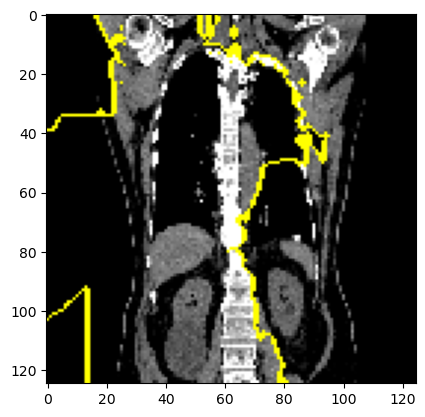

In [154]:
from skimage.segmentation import mark_boundaries

plt.imshow(X_test_cluster0[idx_class0].reshape(200,200,3))
image, mask = explanation.get_image_and_mask(
         make_prediction(
              X_test_cluster0[idx_class0].reshape(200,200,3)).argmax(axis=1)[0],positive_only=True,hide_rest=False)
plt.imshow(mark_boundaries(image, mask))

Class 1 - Normal

In [158]:
explanation = explainer.explain_instance(X_test_cluster0[idx_class1].reshape(200,200,3).astype('double'), make_prediction)

  0%|          | 0/1000 [00:00<?, ?it/s]

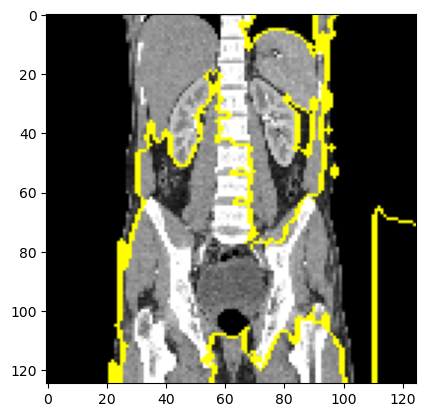

In [159]:
from skimage.segmentation import mark_boundaries

plt.imshow(X_test_cluster0[idx_class1].reshape(200,200,3))
image, mask = explanation.get_image_and_mask(
         make_prediction(
              X_test_cluster0[idx_class1].reshape(200,200,3)).argmax(axis=1)[0],positive_only=True,hide_rest=False)
plt.imshow(mark_boundaries(image, mask))

Class 2 - Stone

In [160]:
explanation = explainer.explain_instance(X_test_cluster0[idx_class2].reshape(200,200,3).astype('double'), make_prediction)

  0%|          | 0/1000 [00:00<?, ?it/s]

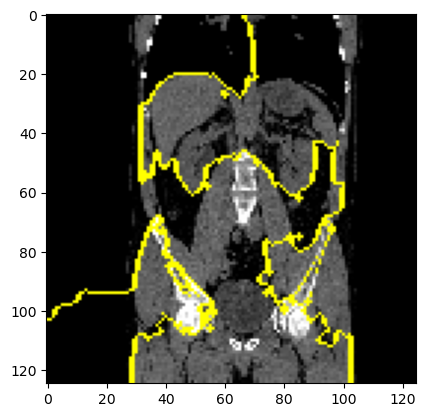

In [161]:
from skimage.segmentation import mark_boundaries

plt.imshow(X_test_cluster0[idx_class2].reshape(200,200,3))
image, mask = explanation.get_image_and_mask(
         make_prediction(
              X_test_cluster0[idx_class2].reshape(200,200,3)).argmax(axis=1)[0],positive_only=True,hide_rest=False)
plt.imshow(mark_boundaries(image, mask))

Class 3 - Tumour

In [162]:
explanation = explainer.explain_instance(X_test_cluster0[idx_class3].reshape(200,200,3).astype('double'), make_prediction)

  0%|          | 0/1000 [00:00<?, ?it/s]

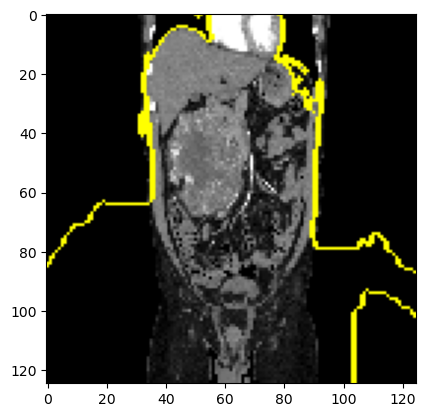

In [163]:
from skimage.segmentation import mark_boundaries

plt.imshow(X_test_cluster0[idx_class3].reshape(200,200,3))
image, mask = explanation.get_image_and_mask(
         make_prediction(
              X_test_cluster0[idx_class3].reshape(200,200,3)).argmax(axis=1)[0],positive_only=True,hide_rest=False)
plt.imshow(mark_boundaries(image, mask))

## Random Forest Cluster 1 LIME

In [164]:
 y_test_pred_cluster1

array([1, 1, 3, 1, 0, 1, 1, 1, 0, 1, 3, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 3, 0, 0,
       1, 3, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 3, 0, 1, 1, 0, 1, 1, 0, 1,
       3, 1, 0, 0, 0, 3, 3, 1, 0, 0, 1, 3, 0, 1, 1, 3, 1, 2, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 3, 3, 1, 3, 0, 0, 3, 1, 0, 1, 1, 3, 1, 0, 0, 1, 0,
       0, 2, 0, 0, 0, 1, 1, 3, 0, 1, 0, 3, 1, 1, 0, 1, 0, 3, 0, 0, 1, 3,
       3, 2, 1, 1, 2, 0, 0, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 2, 1, 3, 0, 1, 1, 3, 0, 3, 0, 0, 0, 1, 1, 0, 2, 0, 3, 0,
       3, 0, 2, 2, 0, 3, 0, 0, 3, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 3, 1, 0, 1, 0, 0, 1, 1, 1, 3, 0, 3,
       0, 3, 1, 1, 3, 1, 3, 1, 0, 1, 1, 0, 0, 1, 1, 3, 1, 0, 1, 1, 2, 2,
       1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 2, 1, 3, 0, 0, 1, 0, 1, 2, 3, 1, 0, 0, 1, 3, 0,
       0, 1, 1, 0, 3, 3, 1, 3, 3, 1, 3, 1, 2, 3, 3,

In [165]:
 y_test_cluster1

array([1, 1, 3, 1, 0, 1, 1, 1, 0, 1, 3, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 3, 0, 0,
       1, 3, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 3, 0, 1, 1, 0, 1, 1, 0, 1,
       3, 1, 0, 0, 0, 3, 3, 1, 0, 0, 1, 3, 0, 1, 1, 3, 1, 2, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 3, 3, 1, 3, 0, 0, 3, 1, 0, 1, 1, 3, 1, 0, 0, 1, 0,
       0, 2, 0, 0, 0, 1, 1, 3, 0, 1, 0, 3, 1, 1, 0, 1, 0, 3, 0, 0, 1, 3,
       3, 2, 1, 1, 2, 0, 0, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 2, 1, 3, 0, 1, 1, 3, 0, 3, 0, 0, 0, 1, 1, 0, 2, 0, 3, 0,
       3, 0, 2, 2, 0, 3, 0, 0, 3, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 3, 1, 0, 1, 0, 0, 1, 1, 1, 3, 0, 3,
       0, 3, 1, 1, 3, 1, 3, 1, 0, 1, 1, 0, 0, 1, 1, 3, 1, 0, 1, 1, 2, 2,
       1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 2, 1, 3, 0, 0, 1, 0, 1, 2, 3, 1, 0, 0, 1, 3, 0,
       0, 1, 1, 0, 3, 3, 1, 3, 3, 1, 3, 1, 2, 3, 3,

In [168]:
idx_class0 = 4
idx_class1 = 0
idx_class2 = 12 
idx_class3 = 2

In [173]:
#change to cluster 1
def make_prediction(img):
    img = img.reshape(-1, 12000)
    preds = rf_cluster1.predict_proba(img)
    return preds

Class 0 - Cyst

In [174]:
explanation = explainer.explain_instance(X_test_cluster1[idx_class0].reshape(200,200,3).astype('double'), make_prediction)

  0%|          | 0/1000 [00:00<?, ?it/s]

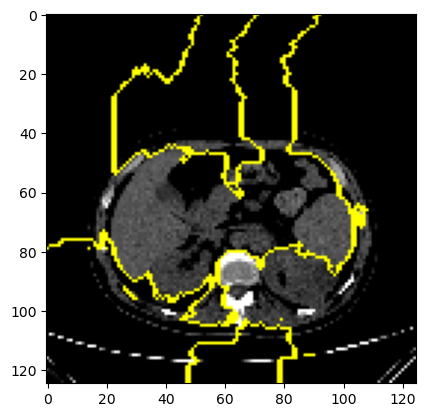

In [176]:
from skimage.segmentation import mark_boundaries

plt.imshow(X_test_cluster1[idx_class0].reshape(200,200,3))
image, mask = explanation.get_image_and_mask(
         make_prediction(
              X_test_cluster1[idx_class0].reshape(200,200,3)).argmax(axis=1)[0],positive_only=True,hide_rest=False)
plt.imshow(mark_boundaries(image, mask))

Class 1 - Normal

In [177]:
explanation = explainer.explain_instance(X_test_cluster1[idx_class1].reshape(200,200,3).astype('double'), make_prediction)

  0%|          | 0/1000 [00:00<?, ?it/s]

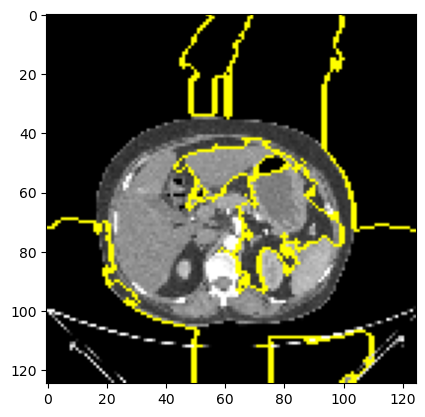

In [178]:
from skimage.segmentation import mark_boundaries

plt.imshow(X_test_cluster1[idx_class1].reshape(200,200,3))
image, mask = explanation.get_image_and_mask(
         make_prediction(
              X_test_cluster1[idx_class1].reshape(200,200,3)).argmax(axis=1)[0],positive_only=True,hide_rest=False)
plt.imshow(mark_boundaries(image, mask))

Class 2 - Stone

In [179]:
explanation = explainer.explain_instance(X_test_cluster1[idx_class2].reshape(200,200,3).astype('double'), make_prediction)

  0%|          | 0/1000 [00:00<?, ?it/s]

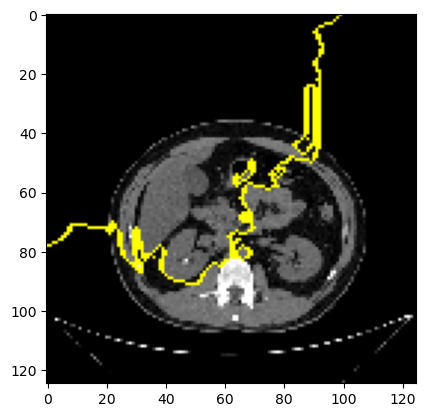

In [180]:
from skimage.segmentation import mark_boundaries

plt.imshow(X_test_cluster1[idx_class2].reshape(200,200,3))
image, mask = explanation.get_image_and_mask(
         make_prediction(
              X_test_cluster1[idx_class2].reshape(200,200,3)).argmax(axis=1)[0],positive_only=True,hide_rest=False)
plt.imshow(mark_boundaries(image, mask))

Class 3 - Tumour

In [181]:
explanation = explainer.explain_instance(X_test_cluster1[idx_class3].reshape(200,200,3).astype('double'), make_prediction)

  0%|          | 0/1000 [00:00<?, ?it/s]

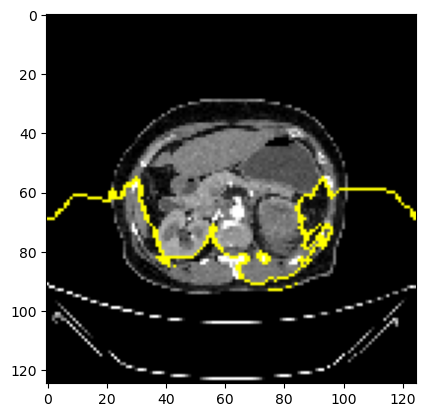

In [182]:
from skimage.segmentation import mark_boundaries

plt.imshow(X_test_cluster1[idx_class3].reshape(200,200,3))
image, mask = explanation.get_image_and_mask(
         make_prediction(
              X_test_cluster1[idx_class3].reshape(200,200,3)).argmax(axis=1)[0],positive_only=True,hide_rest=False)
plt.imshow(mark_boundaries(image, mask))